# Einrichten & Datenimport

In [26]:
import pandas as pd
import plotly.express as px

In [27]:
df = pd.read_csv("../data/data.csv")

# Daten aufbereiten

Alle Einträge, die mehrfach die gleiche ID verwenden:

In [28]:
duplicated_entries = df[df.duplicated("id", keep=False)]
duplicated_entries.sort_values(by="id")

,id,fingerprint,test,fragen_gefuehle_beruf,fragen_warum_lehrer,fragen_oeffentlichkeit_meinung,fragen_vorwurf_eltern,fragen_internet,bionic_schneller,bionic_leichter,...,bionic_in_schule,bionic_anmerkungen,persoenlich_freude_lesen,persoenlich_haeufigkeit_lesen,persoenlich_ziel_lesen,persoenlich_textverstaendnis,persoenlich_alter,reading_count,reading_duration,questions_duration
1,1c20b10b-7b40-4f72-ad62-d0f82dffe16c,3f9e59cdd2fbc071de73b4cf87d21eb8,True,1.0,0.0,2.0,1.0,0.0,2.0,2.0,...,1.0,NaN,0.0,0.0,0.0,1.0,18.0,2.0,190115.0,76773.0
6,1c20b10b-7b40-4f72-ad62-d0f82dffe16c,3f9e59cdd2fbc071de73b4cf87d21eb8,True,1.0,0.0,2.0,1.0,0.0,2.0,2.0,...,1.0,NaN,0.0,0.0,0.0,1.0,18.0,2.0,190115.0,76773.0
53,2eeeab3e-7ba6-4797-8ab5-a1f66651c17a,b8e5e010a46c8e7e722ec87c63c9e0cb,False,1.0,0.0,0.0,2.0,2.0,NaN,NaN,...,NaN,NaN,2.0,2.0,0.0,0.0,12.0,3.0,462458.0,220544.0
54,2eeeab3e-7ba6-4797-8ab5-a1f66651c17a,b8e5e010a46c8e7e722ec87c63c9e0cb,False,1.0,0.0,0.0,0.0,2.0,NaN,NaN,...,NaN,NaN,2.0,2.0,0.0,0.0,12.0,3.0,462458.0,220544.0
28,5a57eb63-7152-41ef-902d-8c2c1fba257b,b8e5e010a46c8e7e722ec87c63c9e0cb,False,1.0,0.0,3.0,1.0,0.0,NaN,NaN,...,NaN,NaN,3.0,2.0,0.0,2.0,13.0,2.0,231758.0,103286.0
32,5a57eb63-7152-41ef-902d-8c2c1fba257b,b8e5e010a46c8e7e722ec87c63c9e0cb,False,1.0,0.0,3.0,1.0,0.0,NaN,NaN,...,NaN,NaN,3.0,2.0,0.0,2.0,13.0,2.0,231758.0,103286.0
2,e43c464c-543d-4a31-bbc7-ddc59c97f4d6,f5129980f00eff8b06c6d9dc53152514,True,1.0,2.0,0.0,1.0,0.0,1.0,2.0,...,0.0,NaN,2.0,1.0,1.0,2.0,18.0,1.0,177276.0,105965.0
3,e43c464c-543d-4a31-bbc7-ddc59c97f4d6,f5129980f00eff8b06c6d9dc53152514,True,1.0,2.0,0.0,1.0,0.0,1.0,2.0,...,0.0,NaN,2.0,1.0,1.0,2.0,18.0,1.0,177276.0,105965.0


Entferne alle doppelten Einträge und behalte nur den letzten (aktuellen) Eintrag.

In [29]:
df = df.drop_duplicates(subset="id", keep="last")

Alle Einträge ohne Tracking-Daten können nicht richtig ausgewertet werden. Deshalb werden sie entfernt.

In [30]:
# Entferne alle Einträge, die keine Tracking-Daten beinhalten
df = df.dropna(subset=["reading_duration", "reading_count", "questions_duration"])

In [31]:
# Millisekunden -> Sekunden
df["reading_duration"] = df.apply(lambda row: row["reading_duration"] / 1000, axis=1)
df["questions_duration"] = df.apply(lambda row: float(row["questions_duration"]) / 1000, axis=1)

# Standardwerte

Wie `color_maps`

In [32]:
test_color_map = {True: "#00cc96", False: "#636efa", "true": "#00cc96", "false": "#636efa"}

# Überblick

## Datenset

In [33]:
df

,id,fingerprint,test,fragen_gefuehle_beruf,fragen_warum_lehrer,fragen_oeffentlichkeit_meinung,fragen_vorwurf_eltern,fragen_internet,bionic_schneller,bionic_leichter,...,bionic_in_schule,bionic_anmerkungen,persoenlich_freude_lesen,persoenlich_haeufigkeit_lesen,persoenlich_ziel_lesen,persoenlich_textverstaendnis,persoenlich_alter,reading_count,reading_duration,questions_duration
0,3cc07733-3742-4090-994a-a5871016ebcc,d416268a243114c1742cc14e71814ade,True,1.0,0.0,2.0,1.0,0.0,1.0,1.0,...,0.0,NaN,0.0,0.0,0.0,3.0,18.0,1.0,128.633,31.664
3,e43c464c-543d-4a31-bbc7-ddc59c97f4d6,f5129980f00eff8b06c6d9dc53152514,True,1.0,2.0,0.0,1.0,0.0,1.0,2.0,...,0.0,NaN,2.0,1.0,1.0,2.0,18.0,1.0,177.276,105.965
4,731e6143-04f3-4fff-a904-b86052d8686d,c1ed69d201693ed73e4c6c85f52e6a5c,True,2.0,0.0,0.0,1.0,0.0,4.0,4.0,...,1.0,NaN,3.0,1.0,1.0,3.0,18.0,2.0,249.590,107.136
5,a215e1a9-d4c2-4ee7-a78c-f2d5d530e4af,6898bfdd0f38c8e83dfbd0c3fd40aee9,False,1.0,0.0,2.0,1.0,0.0,NaN,NaN,...,NaN,NaN,4.0,3.0,1.0,1.0,18.0,1.0,241.075,99.902
6,1c20b10b-7b40-4f72-ad62-d0f82dffe16c,3f9e59cdd2fbc071de73b4cf87d21eb8,True,1.0,0.0,2.0,1.0,0.0,2.0,2.0,...,1.0,NaN,0.0,0.0,0.0,1.0,18.0,2.0,190.115,76.773
7,0d905c92-b91e-4f43-9309-beaf86872e93,fee6d4e6a610cfcbc9051b428ad19e79,False,1.0,0.0,3.0,1.0,0.0,NaN,NaN,...,NaN,NaN,4.0,4.0,0.0,3.0,18.0,2.0,312.680,116.154
8,a61a874d-4644-4d4d-b449-b86ebea20ee7,c3f1241ad2075447c25aae02ec98c70f,False,1.0,0.0,2.0,1.0,0.0,NaN,NaN,...,NaN,NaN,3.0,1.0,0.0,3.0,NaN,2.0,314.057,161.678
9,9060e823-c05e-41ae-9c36-10c77e389be7,5eeefb9a8a6e1cc2490146ff16de1554,True,2.0,0.0,0.0,3.0,0.0,2.0,3.0,...,1.0,Ich hab das Interesse verloren und nicht weite...,4.0,4.0,0.0,0.0,18.0,1.0,158.973,80.649
10,50f3ff0e-a6c7-4cd8-9a81-bb1fbd78b469,ea02294e29b26c0a8bd20eb6df8c6609,False,1.0,0.0,2.0,2.0,1.0,NaN,NaN,...,NaN,NaN,4.0,3.0,0.0,1.0,19.0,4.0,166.919,87.284
11,6f44d6e8-3d8c-46fe-9ae3-db136e738aa5,3cfda0b0235d557b05b61b4a0fe4ca11,True,1.0,0.0,2.0,1.0,3.0,3.0,3.0,...,1.0,NaN,4.0,3.0,1.0,0.0,18.0,1.0,208.914,126.138


## Test- & Kontrollgruppe

In [34]:
test_counts = df["test"].value_counts().reset_index().sort_values(by="test")
test_counts

,test,count
0,False,28
1,True,26


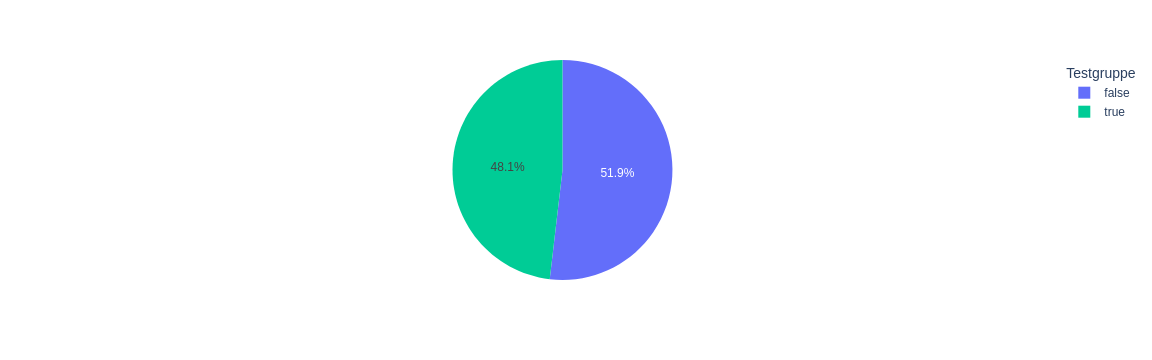

In [35]:
fig = px.pie(test_counts, names="test", values="count", color_discrete_sequence=[test_color_map[0], test_color_map[1]])
fig.update_layout(legend_title="Testgruppe")
fig.show()

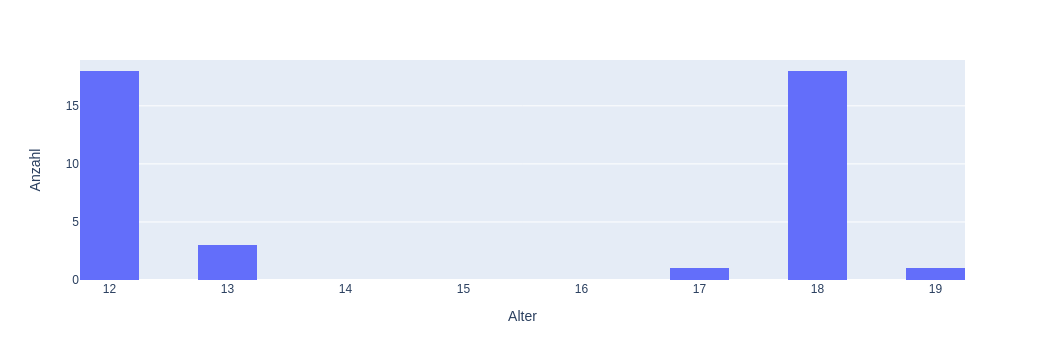

In [52]:
fig = px.histogram(df, x="persoenlich_alter", nbins=20)
fig.update_xaxes(title_text="Alter")
fig.update_yaxes(title_text="Anzahl")
fig.show()

# Tracking-Daten

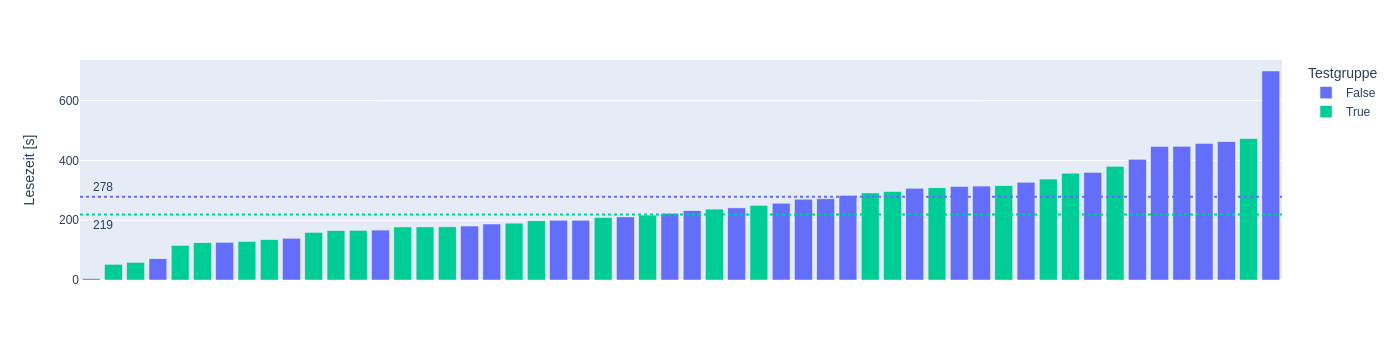

In [66]:
# Säulendiagramm
fig = px.bar(df.sort_values(by=["reading_duration"]), x="id", y="reading_duration", color="test", color_discrete_map=test_color_map)
fig.update_xaxes(showticklabels=False, title_text="")
fig.update_yaxes(title_text="Lesezeit [s]")
fig.update_coloraxes(colorbar_title="Testgruppe?")
fig.update_layout(xaxis_categoryorder = 'total ascending')
fig.update_layout(legend_title="Testgruppe")

# Liniendiagramme
average_reading_duration = df.groupby('test')['reading_duration'].mean()

fig.add_hline(y=average_reading_duration.loc[False], line_dash="dot", line_color=test_color_map[False], annotation_text=f"   {round(average_reading_duration.loc[False])}", annotation_position="left top")
fig.add_hline(y=average_reading_duration.loc[True], line_dash="dot", line_color=test_color_map[True], annotation_text=f"   {round(average_reading_duration.loc[True])}", annotation_position="left bottom")

fig.show()

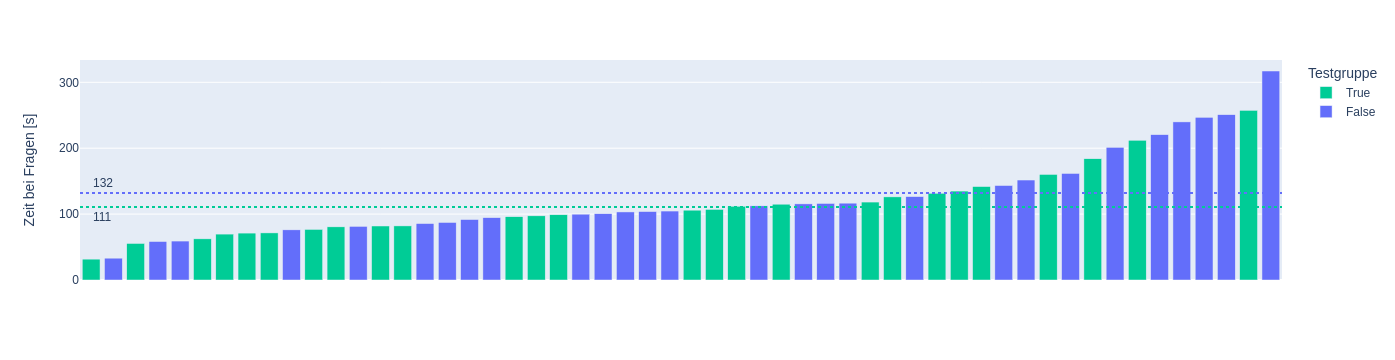

In [68]:
# Säulendiagramm
fig = px.bar(df.sort_values(by=["questions_duration"]), x="id", y="questions_duration", color="test", color_discrete_map=test_color_map)
fig.update_xaxes(showticklabels=False, title_text="")
fig.update_yaxes(title_text="Zeit bei Fragen [s]")
fig.update_layout(xaxis_categoryorder = 'total ascending')
fig.update_layout(legend_title="Testgruppe")

# Liniendiagramme
average_questions_duration = df.groupby('test')['questions_duration'].mean()

fig.add_hline(y=average_questions_duration.loc[False], line_dash="dot", line_color=test_color_map[False], annotation_text=f"   {round(average_questions_duration.loc[False])}", annotation_position="left top")
fig.add_hline(y=average_questions_duration.loc[True], line_dash="dot", line_color=test_color_map[True], annotation_text=f"   {round(average_questions_duration.loc[True])}", annotation_position="left bottom")

fig.show()

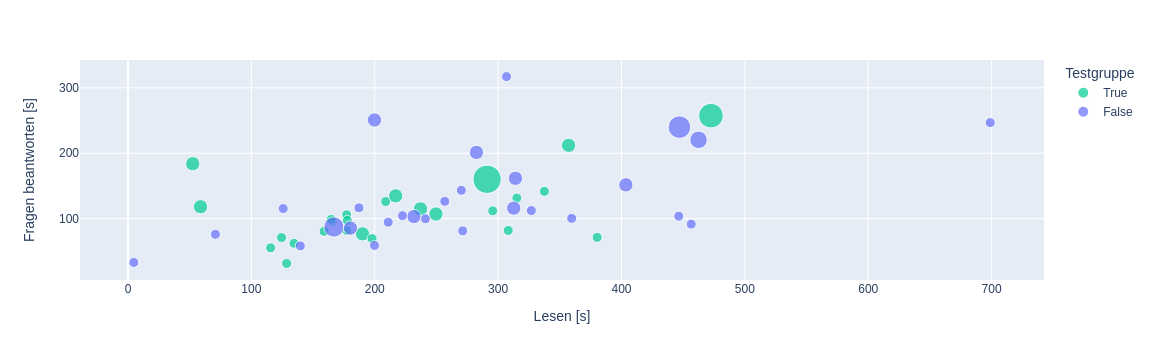

In [39]:
fig = px.scatter(df, x="reading_duration", y="questions_duration", color="test", size="reading_count", color_discrete_map=test_color_map)
fig.update_xaxes(title_text="Lesen [s]")
fig.update_yaxes(title_text="Fragen beantworten [s]")
fig.update_layout(legend_title="Testgruppe")
fig.show()

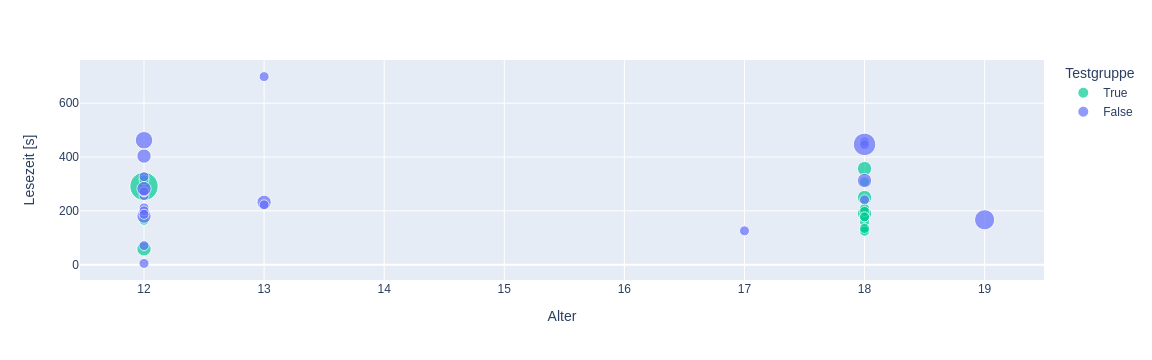

In [40]:
fig = px.scatter(df, x="persoenlich_alter", y="reading_duration", color="test", size="reading_count", color_discrete_map=test_color_map)
fig.update_xaxes(title_text="Alter")
fig.update_yaxes(title_text="Lesezeit [s]")
fig.update_layout(legend_title="Testgruppe")
fig.show()